In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv


**Hybrid model**

Epoch 1/100
12/12 - 43s - loss: 0.5475 - accuracy: 0.7451 - val_loss: 0.4837 - val_accuracy: 0.7487 - 43s/epoch - 4s/step
Epoch 2/100
12/12 - 0s - loss: 0.3965 - accuracy: 0.8265 - val_loss: 0.4583 - val_accuracy: 0.7801 - 265ms/epoch - 22ms/step
Epoch 3/100
12/12 - 0s - loss: 0.3736 - accuracy: 0.8384 - val_loss: 0.4457 - val_accuracy: 0.8325 - 277ms/epoch - 23ms/step
Epoch 4/100
12/12 - 0s - loss: 0.3652 - accuracy: 0.8397 - val_loss: 0.4429 - val_accuracy: 0.7696 - 279ms/epoch - 23ms/step
Epoch 5/100
12/12 - 0s - loss: 0.3441 - accuracy: 0.8581 - val_loss: 0.4354 - val_accuracy: 0.8325 - 279ms/epoch - 23ms/step
Epoch 6/100
12/12 - 0s - loss: 0.3311 - accuracy: 0.8541 - val_loss: 0.4313 - val_accuracy: 0.7958 - 272ms/epoch - 23ms/step
Epoch 7/100
12/12 - 0s - loss: 0.3152 - accuracy: 0.8673 - val_loss: 0.4259 - val_accuracy: 0.8220 - 285ms/epoch - 24ms/step
Epoch 8/100
12/12 - 0s - loss: 0.3048 - accuracy: 0.8739 - val_loss: 0.4278 - val_accuracy: 0.8272 - 276ms/epoch - 23ms/step
Epo

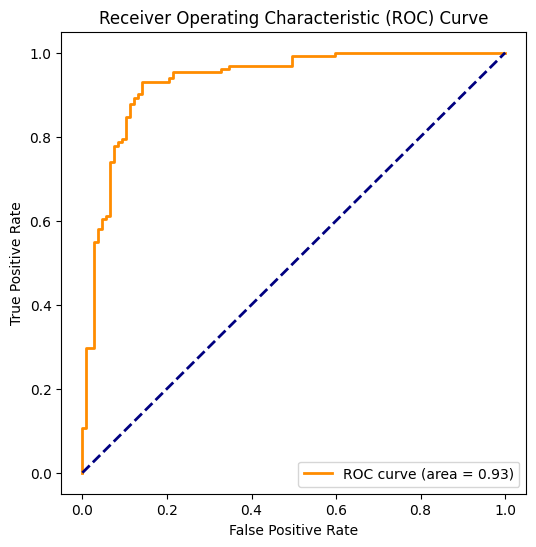

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for CNN input
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

# Reshape the data for RNN (SimpleRNN) input
X_train_rnn = X_train.reshape(-1, 1, X_train.shape[1])
X_test_rnn = X_test.reshape(-1, 1, X_test.shape[1])

# Reshape the data for LSTM input
X_train_lstm = X_train.reshape(-1, 1, X_train.shape[1])
X_test_lstm = X_test.reshape(-1, 1, X_test.shape[1])

# Reshape the data for GRU input
X_train_gru = X_train.reshape(-1, 1, X_train.shape[1])
X_test_gru = X_test.reshape(-1, 1, X_test.shape[1])

# Combine all models into a single architecture using the functional API
input_cnn = keras.Input(shape=(X_train_cnn.shape[1], 1))
cnn_layer = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(input_cnn)
cnn_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)
cnn_layer = layers.Flatten()(cnn_layer)

input_rnn = keras.Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))
rnn_layer = layers.SimpleRNN(64, return_sequences=True, activation='relu')(input_rnn)
rnn_layer = layers.SimpleRNN(32, return_sequences=True)(rnn_layer)
rnn_layer = layers.SimpleRNN(16)(rnn_layer)

input_lstm = keras.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
lstm_layer = layers.LSTM(64, return_sequences=True, activation='relu')(input_lstm)
lstm_layer = layers.LSTM(32, return_sequences=True)(lstm_layer)
lstm_layer = layers.LSTM(16)(lstm_layer)

input_gru = keras.Input(shape=(X_train_gru.shape[1], X_train_gru.shape[2]))
gru_layer = layers.GRU(64, return_sequences=True, activation='relu')(input_gru)
gru_layer = layers.GRU(32, return_sequences=True)(gru_layer)
gru_layer = layers.GRU(16)(gru_layer)

# Bidirectional LSTM
input_bilstm = keras.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
bilstm_layer = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='relu'))(input_bilstm)
bilstm_layer = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(bilstm_layer)
bilstm_layer = layers.Bidirectional(layers.LSTM(16))(bilstm_layer)

# Bidirectional GRU
input_bigru = keras.Input(shape=(X_train_gru.shape[1], X_train_gru.shape[2]))
bigru_layer = layers.Bidirectional(layers.GRU(64, return_sequences=True, activation='relu'))(input_bigru)
bigru_layer = layers.Bidirectional(layers.GRU(32, return_sequences=True))(bigru_layer)
bigru_layer = layers.Bidirectional(layers.GRU(16))(bigru_layer)

# Concatenate the outputs from all branches
concatenated = layers.Concatenate(axis=-1)([cnn_layer, rnn_layer, lstm_layer, gru_layer, bilstm_layer, bigru_layer])

# Additional dense layers
x = layers.Dense(128, activation='relu')(concatenated)
output = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = keras.Model(inputs=[input_cnn, input_rnn, input_lstm, input_gru, input_bilstm, input_bigru], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit([X_train_cnn, X_train_rnn, X_train_lstm, X_train_gru, X_train_lstm, X_train_gru],
                    y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_test_cnn, X_test_rnn, X_test_lstm, X_test_gru, X_test_lstm, X_test_gru], y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Confusion Matrix
y_pred = (model.predict([X_test_cnn, X_test_rnn, X_test_lstm, X_test_gru, X_test_lstm, X_test_gru]) > 0.8).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1]))
print("F1 Score:", f1)

# ROC Curve with AUC
y_pred_proba = model.predict([X_test_cnn, X_test_rnn, X_test_lstm, X_test_gru, X_test_lstm, X_test_gru])
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**CatBoost**

0:	learn: 0.6508561	test: 0.6507794	best: 0.6507794 (0)	total: 54.6ms	remaining: 5.41s
10:	learn: 0.4490605	test: 0.4565264	best: 0.4565264 (10)	total: 67.5ms	remaining: 546ms
20:	learn: 0.3701742	test: 0.3835830	best: 0.3835830 (20)	total: 82.7ms	remaining: 311ms
30:	learn: 0.3260317	test: 0.3475595	best: 0.3475595 (30)	total: 95.8ms	remaining: 213ms
40:	learn: 0.2971179	test: 0.3250690	best: 0.3250690 (40)	total: 108ms	remaining: 155ms
50:	learn: 0.2737333	test: 0.3078854	best: 0.3078854 (50)	total: 119ms	remaining: 114ms
60:	learn: 0.2556948	test: 0.2961240	best: 0.2961240 (60)	total: 131ms	remaining: 83.5ms
70:	learn: 0.2394098	test: 0.2855999	best: 0.2855999 (70)	total: 142ms	remaining: 58.2ms
80:	learn: 0.2238746	test: 0.2768071	best: 0.2768071 (80)	total: 155ms	remaining: 36.4ms
90:	learn: 0.2141191	test: 0.2714686	best: 0.2714686 (90)	total: 168ms	remaining: 16.6ms
99:	learn: 0.2079392	test: 0.2695405	best: 0.2695405 (99)	total: 178ms	remaining: 0us

bestTest = 0.2695405347
bes

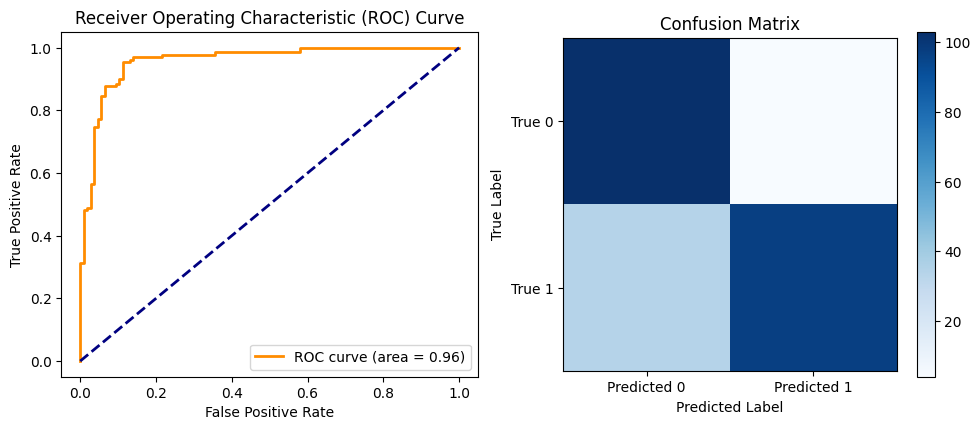

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create and train the CatBoost model
cat_features = []  # You can specify categorical features here
model = CatBoostClassifier(iterations=100, depth=7, learning_rate=0.1, loss_function='Logloss', random_seed=0)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=10)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.8).astype("int32")

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1]))
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display confusion matrix
plt.subplot(2, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])

plt.tight_layout()
plt.show()


**LightGBM**

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.273462
[20]	valid_0's binary_logloss: 0.253843
[30]	valid_0's binary_logloss: 0.241389
Test Accuracy: 0.9243697478991597
Precision: 0.959349593495935
Sensitivity (Recall): 0.9007633587786259
Specificity: 0.9532710280373832
F1 Score: 0.9291338582677164
Confusion Matrix:
[[102   5]
 [ 13 118]]


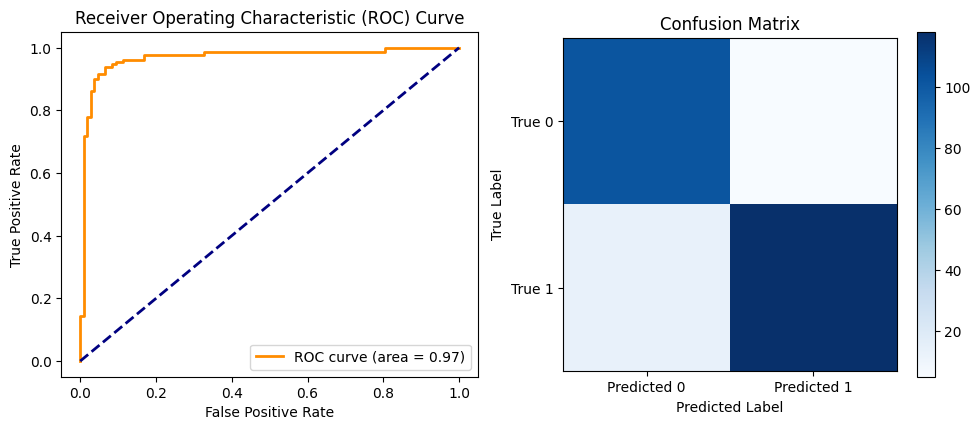

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create and train the LightGBM model
model = LGBMClassifier(n_estimators=100, max_depth=7, learning_rate=0.5, random_state=42, boosting_type='gbdt')

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=10)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.8).astype("int32")

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1]))
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display confusion matrix
plt.subplot(2, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])

plt.tight_layout()
plt.show()
